# The prediction only runs for 3 epochs

In [6]:
import os
from PIL import Image
import numpy as np
import json
import re

input_path = 'MaSTr1325/val_mask/'
output_path = 'MaSTr1325/val_json/'

num = len([f for f in os.listdir(input_path) if f.endswith('m.png')])

pattern = re.compile(r'^\d{3}m\.png$')

for i in range(1, num + 1):
    # construct folder paths
    filename = f"{i:03d}m.png"
    json_name = filename.replace('.png', '.json')
    json_path = os.path.join(output_path, json_name)
    png_path = os.path.join(input_path, filename)
    
    # convert into json file
    image = Image.open(png_path)
    image_data = np.array(image)
    image_data_list = image_data.tolist()
    with open(json_path, 'w') as json_file:
        json.dump(image_data_list, json_file)

266


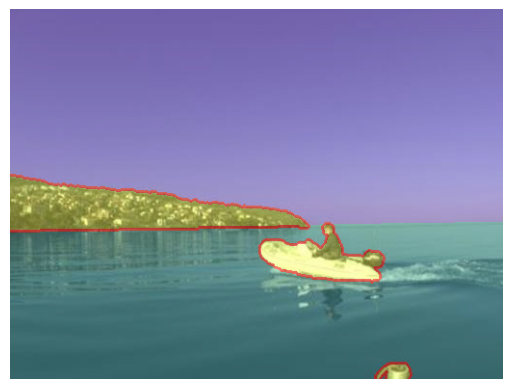

In [3]:
import os
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt

# Path
jpg_path = 'val_001/001.jpg'
json_path = 'val_001/001m.json'

# Define Colour
colors = {
    0: (255, 255, 0, 64),    # yellow (RGBA) = obstacle & environment
    1: (0, 133, 152, 64),    # cyan-blue (RGBA) = water
    2: (129, 0, 255, 64),    # purple (RGBA) = sky
    4: (255, 0, 0, 128)      # red (RGBA) = unknown
}

image = Image.open(jpg_path).convert('RGBA')
with open(json_path, 'r') as json_file:
    mask_data = json.load(json_file)
mask_array = np.array(mask_data)
mask_image = Image.new('RGBA', image.size)
mask_pixels = mask_image.load()

for y in range(mask_array.shape[0]):
    for x in range(mask_array.shape[1]):
        value = mask_array[y, x]
        if value in colors:
            mask_pixels[x, y] = colors[value]

# apply mask to jpg
combined = Image.alpha_composite(image, mask_image)
    
plt.imshow(combined)
plt.axis('off') 
plt.show()


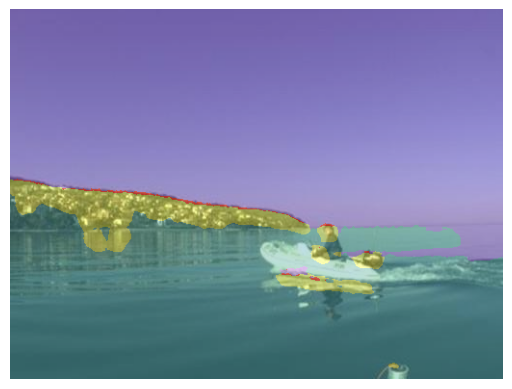

In [4]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt

# Path
jpg_path = 'val_001/001.jpg'
json_path = 'val_001/epoch_2_001m.png.json'
threshold = 0.2

with open(json_path, 'r') as json_file:
    prediction = json.load(json_file)

# convert to numpy array
predictions = np.array(prediction)
predictions = np.transpose(predictions, (1, 2, 0))
predictions_indices = np.argmax(predictions, axis=2)
predictions_values = np.max(predictions, axis=2)
predictions_indices[predictions_values < threshold] = 4

# Define Colour
colors = {
    0: (255, 255, 0, 64),    # yellow (RGBA) = obstacle & environment
    1: (0, 133, 152, 64),    # cyan-blue (RGBA) = water
    2: (129, 0, 255, 64),    # purple (RGBA) = sky
    4: (255, 0, 0, 128)      # red (RGBA) = unknown
}

# Open jpg file
image = Image.open(jpg_path).convert('RGBA')
mask_image = Image.new('RGBA', image.size)
mask_pixels = mask_image.load()

for y in range(predictions_indices.shape[0]):
    for x in range(predictions_indices.shape[1]):
        value = predictions_indices[y, x]
        if value in colors:
            mask_pixels[x, y] = colors[value]

# combine jpg and predictional mask
combined = Image.alpha_composite(image, mask_image)

# display the images
plt.imshow(combined)
plt.axis('off')
plt.show()
